# 특성 공학과 규제

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/3-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 데이터 준비

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy() # csv 파일을 numpy로 변환
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [4]:
import numpy as np
# target data 준비 및 train와 test 세트로 나누기
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [5]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

print('train',train_input.shape)
print('test',test_input.shape)

train (42, 3)
test (14, 3)


## 사이킷런의 변환기

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


In [8]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]]) # 2개의 특성 2와 3으로 이루어진 샘플 하나를 적용
print(poly.transform([[2, 3]])) # Fit method는 새롭게 만들 특성 조합을 찾고, transform 메서드는 실제로 데이터 변환, transform의 degree's default 값은 2

[[2. 3. 4. 6. 9.]]


In [9]:
poly = PolynomialFeatures(include_bias=False) # bias 값 제외

poly.fit(train_input)
train_poly = poly.transform(train_input)

In [10]:
print(train_poly.shape) # 새로운 특성 조합으로 구성된 train_poly

(42, 9)


In [11]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [12]:
print('test',test_input)

test [[ 8.4   2.11  1.41]
 [18.    5.22  3.32]
 [27.5   7.28  4.57]
 [21.3   6.38  3.53]
 [22.5   5.86  3.62]
 [40.   11.14  6.63]
 [30.    7.62  4.77]
 [24.6   6.73  4.17]
 [39.   11.14  7.49]
 [21.    5.69  3.67]
 [43.5  12.6   8.14]
 [16.2   4.59  2.63]
 [28.    7.82  4.2 ]
 [27.3   8.32  5.14]]


In [13]:
test_poly = poly.transform(test_input)
print(test_poly)
print(test_poly.shape)

[[8.400000e+00 2.110000e+00 1.410000e+00 7.056000e+01 1.772400e+01
  1.184400e+01 4.452100e+00 2.975100e+00 1.988100e+00]
 [1.800000e+01 5.220000e+00 3.320000e+00 3.240000e+02 9.396000e+01
  5.976000e+01 2.724840e+01 1.733040e+01 1.102240e+01]
 [2.750000e+01 7.280000e+00 4.570000e+00 7.562500e+02 2.002000e+02
  1.256750e+02 5.299840e+01 3.326960e+01 2.088490e+01]
 [2.130000e+01 6.380000e+00 3.530000e+00 4.536900e+02 1.358940e+02
  7.518900e+01 4.070440e+01 2.252140e+01 1.246090e+01]
 [2.250000e+01 5.860000e+00 3.620000e+00 5.062500e+02 1.318500e+02
  8.145000e+01 3.433960e+01 2.121320e+01 1.310440e+01]
 [4.000000e+01 1.114000e+01 6.630000e+00 1.600000e+03 4.456000e+02
  2.652000e+02 1.240996e+02 7.385820e+01 4.395690e+01]
 [3.000000e+01 7.620000e+00 4.770000e+00 9.000000e+02 2.286000e+02
  1.431000e+02 5.806440e+01 3.634740e+01 2.275290e+01]
 [2.460000e+01 6.730000e+00 4.170000e+00 6.051600e+02 1.655580e+02
  1.025820e+02 4.529290e+01 2.806410e+01 1.738890e+01]
 [3.900000e+01 1.114000e

## 다중 회귀 모델 훈련하기

In [14]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982125


In [15]:
print(lr.score(test_poly, test_target))

0.9714559911594111


In [16]:
print(train_input.shape)

(42, 3)


In [17]:
poly = PolynomialFeatures(degree=5, include_bias=False) # degree 증가

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [18]:
print(train_poly.shape)

(42, 55)


In [19]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999996433


In [20]:
print(lr.score(test_poly, test_target)) # overfitting 발생

-144.40579436844948


## 규제

In [21]:
from sklearn.preprocessing import StandardScaler
# 선형회귀 모델에 규제를 적용할 때, 계수 값의 크기가 서로 많이 다르면 공정한 제어 x
ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [22]:
print(train_scaled.shape)

(42, 55)


## 릿지

In [23]:
from sklearn.linear_model import Ridge

ridge = Ridge() # alpha = 1
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [24]:
print(ridge.score(test_scaled, test_target)) # overfitting 완화

0.9790693977615387


In [25]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

In [26]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100] # 적절한 alpha value를 찾기 위해 r^2값의 그래프를 그려보자
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

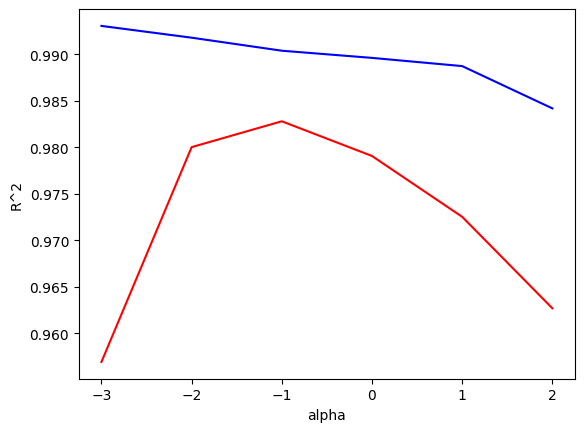

In [27]:
plt.plot(np.log10(alpha_list), train_score,color='blue')
plt.plot(np.log10(alpha_list), test_score,color='red')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [28]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


## 라쏘

In [29]:
from sklearn.linear_model import Lasso
# L1 regularization
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [30]:
print(lasso.score(test_scaled, test_target))

0.9800593698421883


In [31]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter=100000)
    # warning? : 사이킷런의 라소 모델은 최적의 계수를 찾기 위해 반복적인 계산을 수행하는데, 지정한 반복횟수가 부족할 때 이런 경고가 발생
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.393e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.440e+03, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


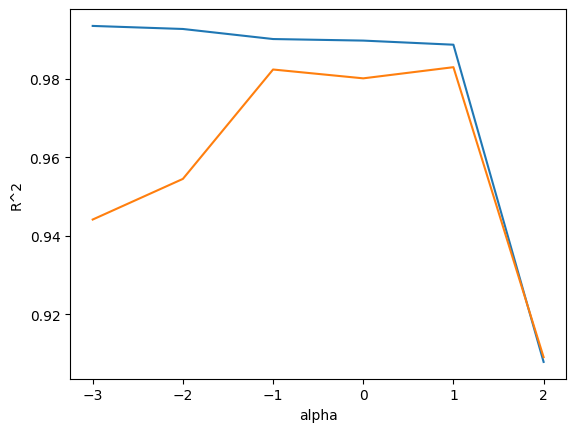

In [34]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [35]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [36]:
print(np.sum(lasso.coef_ == 0)) # 라쏘 모델은 계수 값을 0으로도 만들 수 있음
# 55개 중 40개의 계수가 0이 됨

40
